In [39]:
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [40]:
births = Table.read_table('../../Inferential_Thinking/Data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


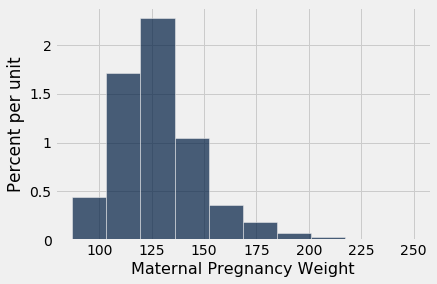

In [41]:
births.drop('Maternal Smoker').hist('Maternal Pregnancy Weight')

In [42]:
mpw = births.column('Maternal Pregnancy Weight')
average = np.average(mpw)
sd = np.std(mpw)
average, sd

(128.4787052810903, 20.72544970428041)

In [43]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(average - 3*sd, average+3*sd))

In [44]:
within_3_SDs.num_rows/births.num_rows

0.9863713798977853

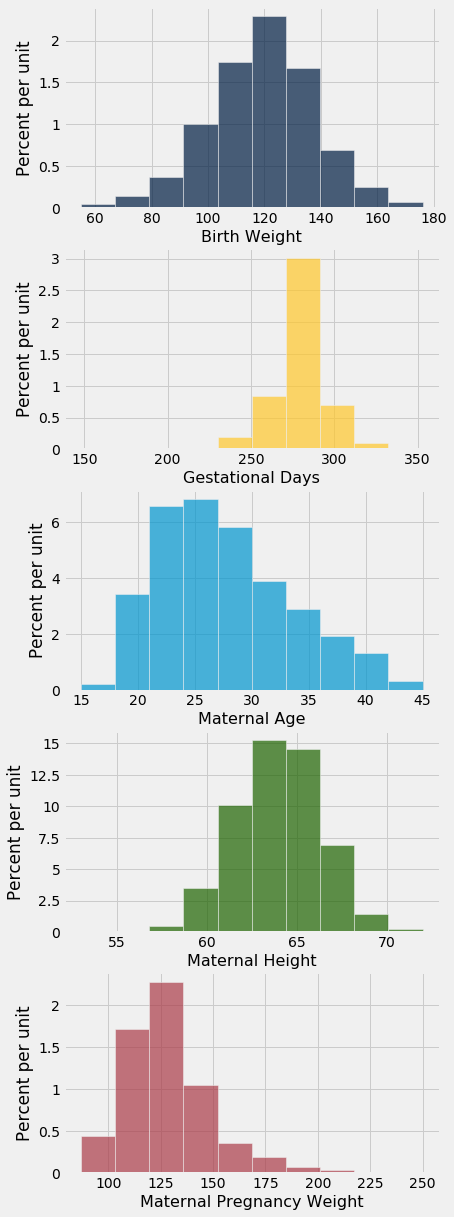

In [45]:
births.drop('Maternal Smoker').hist(overlay = False)

In [46]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [47]:
for k in births.drop('Maternal Smoking').labels:
    values = births.column(k)
    average = np.average(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(2, 6):
        chosen = births.where(k, are.between(average-z*sd, average+z*sd ))
        proportion = chosen.num_rows/births.num_rows
        percent = round(proportion * 100, 2)
        print('Average +/- ', z, 'SDs:', percent, '%')


Birth Weight
Average +/-  2 SDs: 94.89 %
Average +/-  3 SDs: 99.57 %
Average +/-  4 SDs: 100.0 %
Average +/-  5 SDs: 100.0 %

Gestational Days
Average +/-  2 SDs: 93.78 %
Average +/-  3 SDs: 98.64 %
Average +/-  4 SDs: 99.57 %
Average +/-  5 SDs: 99.83 %

Maternal Age
Average +/-  2 SDs: 94.89 %
Average +/-  3 SDs: 99.91 %
Average +/-  4 SDs: 100.0 %
Average +/-  5 SDs: 100.0 %

Maternal Height
Average +/-  2 SDs: 97.19 %
Average +/-  3 SDs: 99.66 %
Average +/-  4 SDs: 99.91 %
Average +/-  5 SDs: 100.0 %

Maternal Pregnancy Weight
Average +/-  2 SDs: 95.06 %
Average +/-  3 SDs: 98.64 %
Average +/-  4 SDs: 99.49 %
Average +/-  5 SDs: 99.91 %

Maternal Smoker
Average +/-  2 SDs: 100.0 %
Average +/-  3 SDs: 100.0 %
Average +/-  4 SDs: 100.0 %
Average +/-  5 SDs: 100.0 %


In [48]:
united = Table.read_table('../../Inferential_Thinking/Data/united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


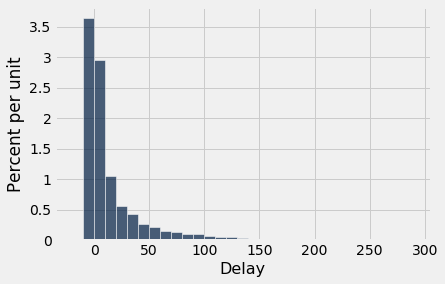

In [49]:
united.hist('Delay', bins=np.arange(-20, 300, 10), ec='w')

In [50]:
np.average(united.column('Delay'))

15.808622196329742

In [51]:
sample_size=1000

averages = make_array()
for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_average = np.average(sampled_flights.column('Delay'))
    averages = np.append(averages, sample_average)

Text(0.5, 0, 'Random sample average')

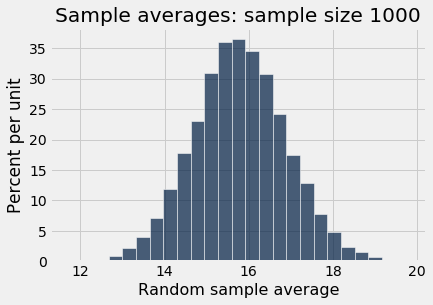

In [52]:
Table().with_column('Sample Average', averages).hist(bins=25, ec='w')
plt.title('Sample averages: sample size ' + str(sample_size))
plt.xlabel('Random sample average')

In [53]:
np.average(united.column('Delay')), np.average(averages)

(15.808622196329742, 15.782212)

In [54]:
8/9

0.8888888888888888

In [55]:
galton = Table.read_table('../../Computation_with_Python/Data/galton.csv')

In [56]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))

In [57]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


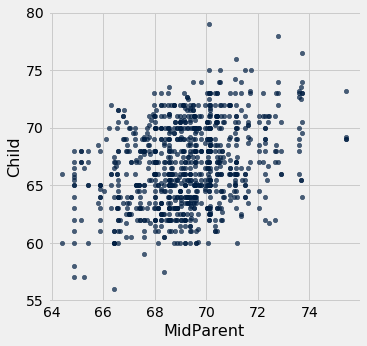

In [58]:
heights.scatter('MidParent')

In [59]:
hybrid = Table.read_table('../Data/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


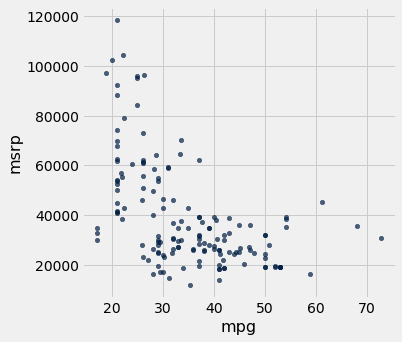

In [60]:
hybrid.scatter('mpg', 'msrp')

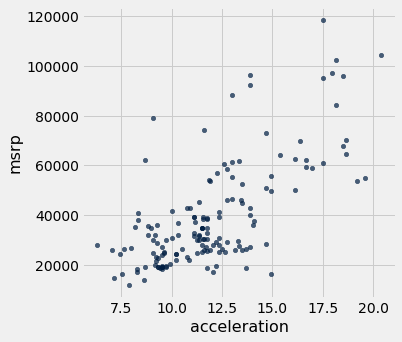

In [61]:
hybrid.scatter('acceleration', 'msrp')

In [62]:
hybrid.labels

('vehicle', 'year', 'msrp', 'acceleration', 'mpg', 'class')

In [63]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

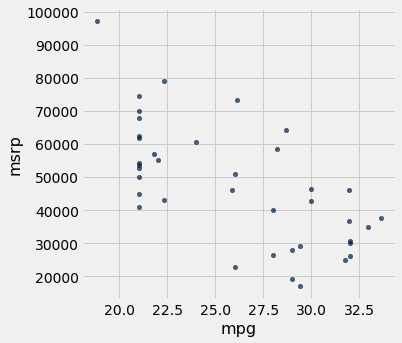

In [64]:
suv.scatter('mpg', 'msrp')

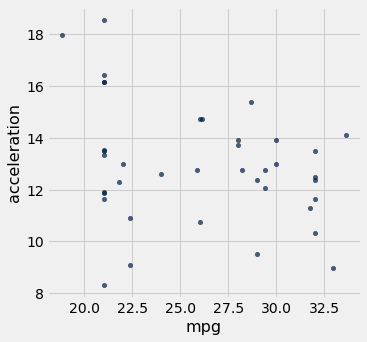

In [65]:
suv.scatter('mpg', 'acceleration')

In [66]:
hybrid.group('class')

class,count
Compact,32
Large,8
Midsize,56
Minivan,4
Pickup Truck,6
SUV,39
Two Seater,8


In [67]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

(-3, 3)

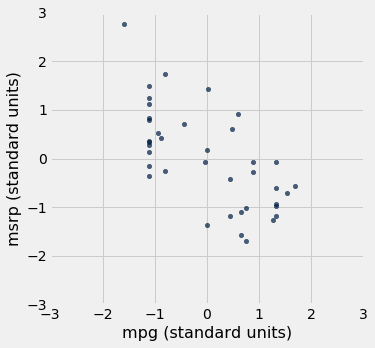

In [68]:
Table().with_columns(
    'mpg (standard units)', standard_units(suv.column('mpg')),
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [73]:
sat2014 = Table.read_table('../Data/sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


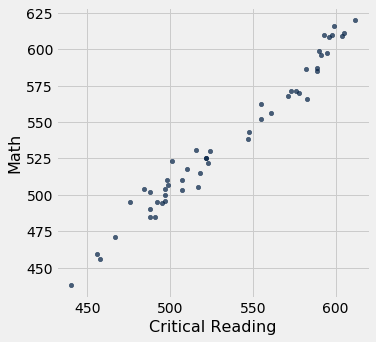

In [74]:
sat2014.scatter('Critical Reading', 'Math')